In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('IMDB-Movie-Data.csv')

3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [4]:
data.shape

(1000, 12)

4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

5. Check Missing Values In The Dataset

In [ ]:
data.isnull().sum()

In [ ]:
sns.heatmap(data.isnull())

6. Drop All The  Missing Values

In [ ]:
data.dropna(axis=0)

In [ ]:
data.isnull().sum()

7. Check For Duplicate Data

In [69]:
data.duplicated().any()

False

In [ ]:
data.drop_duplicates()

8. Get Overall Statistics About The DataFrame

In [ ]:
data.describe(include='all')

9. Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes

In [71]:
data[data['Runtime (Minutes)'] >= 180][['Title', 'Runtime (Minutes)']]

,Title,Runtime (Minutes)
82,The Wolf of Wall Street,180
88,The Hateful Eight,187
311,La vie d'Adèle,180
828,Grindhouse,191
965,Inland Empire,180


10. In Which Year There Was The Highest Average Voting?

In [9]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

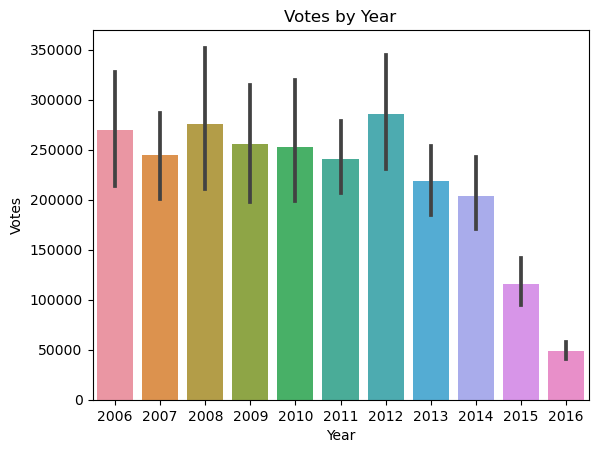

In [73]:
sns.barplot(x ='Year', y='Votes', data = data)
plt.title('Votes by Year')
plt.show()

11. In Which Year There Was The Highest Average Revenue?

In [ ]:
data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

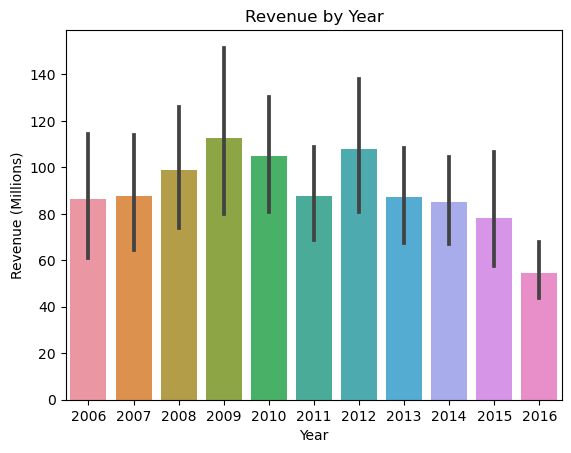

In [75]:
sns.barplot(y = 'Revenue (Millions)', x = 'Year', data = data)
plt.title('Revenue by Year')
plt.show()

12. Find The Average Rating For Each Director

In [76]:
data.groupby('Director')['Rating'].mean().sort_values(ascending = False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

13. Display Top 10 Lengthy Movies Title and Runtime

In [77]:
top10_len = data.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']].set_index('Title')
top10_len

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


<AxesSubplot:xlabel='Runtime (Minutes)', ylabel='Title'>

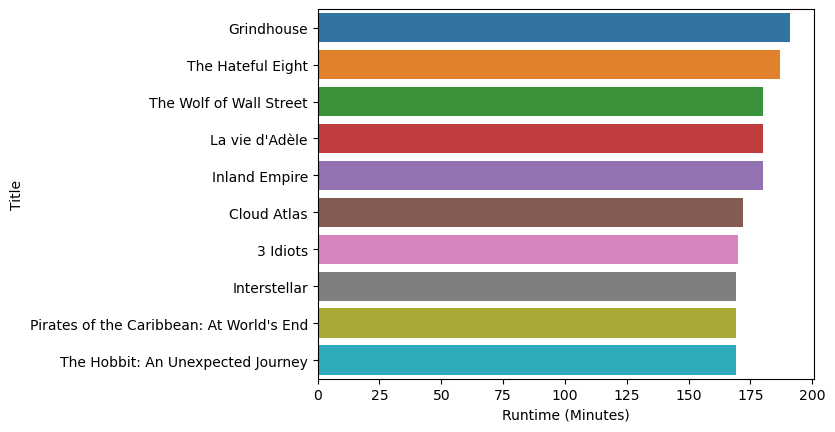

In [78]:
sns.barplot(x='Runtime (Minutes)', y=top10_len.index, data=top10_len)

14. Display Number of Movies Per Year

In [79]:
data['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

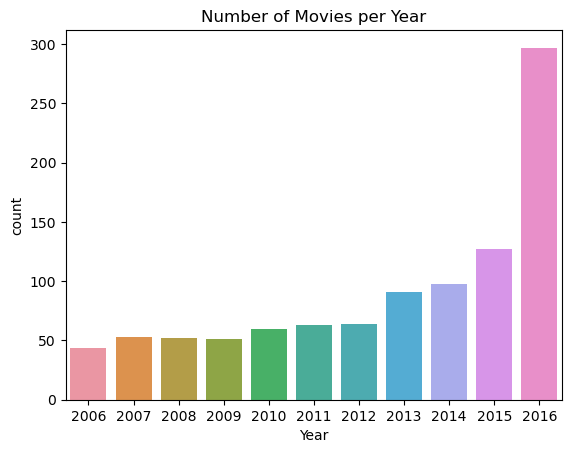

In [80]:
sns.countplot(x='Year', data=data)
plt.title('Number of Movies per Year')
plt.show()

15. Find Most Popular Movie Title (Highest Revenue)

In [87]:
data[data['Revenue (Millions)'].max() == data['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

16. Display Top 10 Highest Rated Movie Titles And its Directors

In [5]:
top10_rating = data.nlargest(10, 'Rating')[['Rating', 'Title', 'Director']].sort_values(by = ['Rating'], ascending=False).set_index('Title')
top10_rating

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Dangal,8.8,Nitesh Tiwari
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan


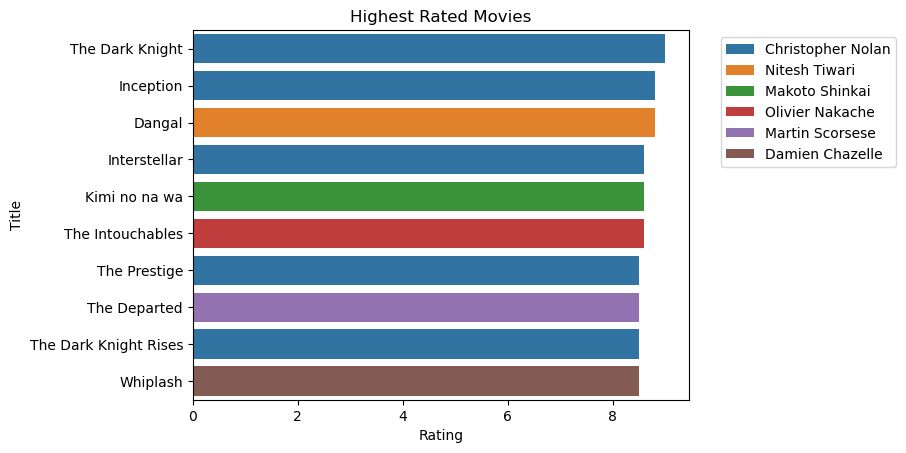

In [8]:
sns.barplot(x='Rating', y=top10_rating.index, data=top10_rating, hue='Director', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Highest Rated Movies')
plt.show()

17. Display Top 10 Highest Revenue Movie Titles

In [17]:
top10_rev = data.nlargest(10, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']].set_index('Title')
top10_rev

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


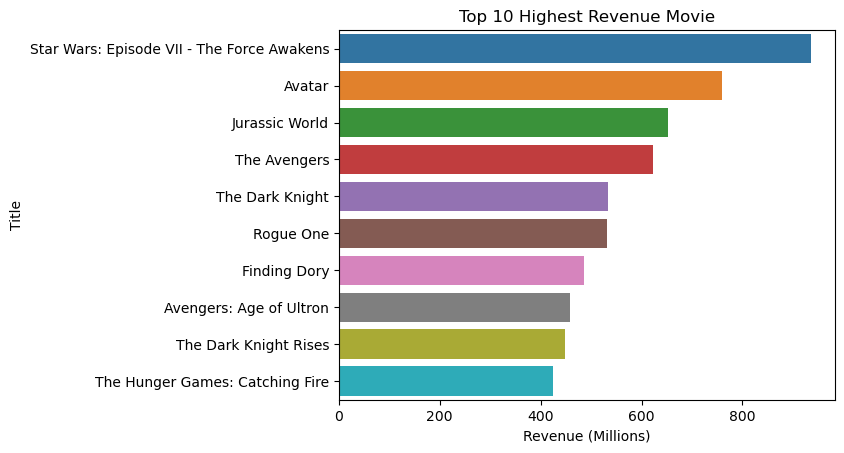

In [20]:
sns.barplot(x='Revenue (Millions)', y=top10_rev.index, data=top10_rev)
plt.title('Top 10 Highest Revenue Movie')
plt.show()

18.  Find Average Rating of Movies Year Wise

In [26]:
avg_rate = data.groupby('Year')['Rating'].mean()
avg_rate

Year
2006    7.125000
2007    7.133962
2008    6.784615
2009    6.960784
2010    6.826667
2011    6.838095
2012    6.925000
2013    6.812088
2014    6.837755
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

19. Does Rating Affect The Revenue?

<AxesSubplot:xlabel='Rating', ylabel='Revenue (Millions)'>

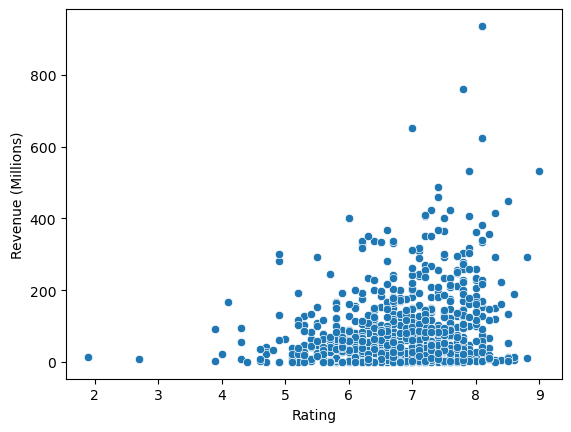

In [28]:
sns.scatterplot(x='Rating', y='Revenue (Millions)', data=data)

20. Classify Movies Based on Ratings [Excellent, Good, and Average]

In [29]:
def rating(rating):
    if rating >= 7.0:
        return "Excellent"
    elif rating >= 6.0:
        return "Good"
    else:
        return "Average"

In [ ]:
data['Rating_cat'] = data['Rating'].apply(rating)
data

21. Count Number of Action Movies

In [7]:
data['Genre'].str.contains('action', case = False).sum()

303

In [9]:
len(data[data['Genre'].str.contains('action', case = False)])

303

22. Find Unique Values From Genre 

In [ ]:
list1 = []
for genre in data['Genre']:
    list1.append(genre.split(','))
list1

In [14]:
genre_flatten = []
for items in list1:
    for item in items:
        if item not in genre_flatten:
            genre_flatten.append(item) 

In [16]:
genre_flatten
len(genre_flatten)

20

23. How Many Films of Each Genre Were Made?

In [17]:
gen_frequency = []
for items in list1:
    for item in items:
        gen_frequency.append(item)

In [ ]:
gen_frequency

In [22]:
from collections import Counter

In [23]:
Counter(gen_frequency)

Counter({'Action': 303,
         'Adventure': 259,
         'Sci-Fi': 120,
         'Mystery': 106,
         'Horror': 119,
         'Thriller': 195,
         'Animation': 49,
         'Comedy': 279,
         'Family': 51,
         'Fantasy': 101,
         'Drama': 513,
         'Music': 16,
         'Biography': 81,
         'Romance': 141,
         'History': 29,
         'Crime': 150,
         'Western': 7,
         'War': 13,
         'Musical': 5,
         'Sport': 18})